In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
os.environ['DISABLE_V2_BEHAVIOR'] = '1'

In [11]:
import os
import sys
import ktrain
from ktrain import vision as vis
import time

In [9]:
DATADIR = 'casting_data/'
(train_data, val_data, preproc) = vis.images_from_folder(
                                              datadir=DATADIR,
                                              data_aug = vis.get_data_aug(horizontal_flip=True),
                                              train_test_names=['train', 'test'], 
                                              target_size=(224,224), color_mode='rgb')
model = vis.image_classifier('pretrained_resnet50', train_data, val_data, freeze_layers=15)

Found 6633 images belonging to 2 classes.
Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.
The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? False
94781440/94765736 [==============================] - 3s 0us/step
pretrained_resnet50 model created.


In [10]:
learner = ktrain.get_learner(model=model, train_data=train_data, val_data=val_data, 
                             workers=8, use_multiprocessing=False, batch_size=64)

In [13]:
start = time.time()
learner.fit_onecycle(1e-4, 3)
end = time.time()

1651129645.9628613


begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
104/104 [==============================] - ETA: 0s - batch: 51.5000 - size: 63.7788 - loss: 0.5458 - acc: 0.8327

/home/azureuser/.cache/pypoetry/virtualenvs/msbuild-2022-f-n7nuVc-py3.8/lib/python3.8/site-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


104/104 [==============================] - 686s 7s/step - batch: 51.5000 - size: 63.7788 - loss: 0.5457 - acc: 0.8327 - val_loss: 0.2595 - val_acc: 0.9021
Epoch 2/3
104/104 [==============================] - 680s 7s/step - batch: 51.5000 - size: 63.7788 - loss: 0.0788 - acc: 0.9790 - val_loss: 0.2765 - val_acc: 0.9175
Epoch 3/3
104/104 [==============================] - 680s 7s/step - batch: 51.5000 - size: 63.7788 - loss: 0.0559 - acc: 0.9867 - val_loss: 0.2197 - val_acc: 0.9301
1651131691.9852288


In [15]:
print(2046.022367477417/60)

34.10037279129028


In [20]:
predictor = ktrain.get_predictor(model, preproc)

In [19]:
learner.freeze()

In [21]:
predictor.save("impeller_casting_model")

In [5]:
predictor = ktrain.load_predictor("impeller_casting_model")

/home/ubuntu/.cache/pypoetry/virtualenvs/msbuild-2022-i8QduK1b-py3.8/lib/python3.8/site-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [35]:
!!ls {DATADIR}/test/def_front |head -n10

['cast_def_0_1059.jpeg',
 'cast_def_0_1063.jpeg',
 'cast_def_0_108.jpeg',
 'cast_def_0_1096.jpeg',
 'cast_def_0_112.jpeg',
 'cast_def_0_1134.jpeg',
 'cast_def_0_1136.jpeg',
 'cast_def_0_1137.jpeg',
 'cast_def_0_1153.jpeg',
 'cast_def_0_1171.jpeg']

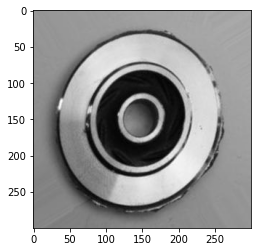

In [36]:
vis.show_image(DATADIR+'test/def_front/cast_def_0_1134.jpeg')

In [37]:
predictor.predict_filename(DATADIR+'/test/def_front/cast_def_0_1134.jpeg')

['def_front']

In [ ]:
print(learner)

In [27]:
x = predictor.explain(DATADIR+'/test/def_front/cast_def_0_1134.jpeg')

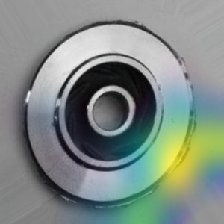

In [28]:
x

In [29]:
import glob, random

def_sample_list = glob.glob(DATADIR+'/test/def_front/' + '*.jpeg')
ok_sample_list = glob.glob(DATADIR+'/test/ok_front/' + '*.jpeg')

In [30]:
def_subset = random.sample(def_sample_list, 60)
ok_subset = random.sample(ok_sample_list, 60)

In [31]:
from PIL import Image
import os

def save_ok_image(ok_img_filename, destination_folder_path):
    img = Image.open(ok_img_filename)
    img.save(destination_folder_path + '/' + os.path.basename(ok_img_filename) + ".png")
    return img

def save_def_image(def_img_filename, destination_folder_path):
    img = predictor.explain(def_img_filename)
    img.save(destination_folder_path + '/' + os.path.basename(def_img_filename) + ".png")
    return img

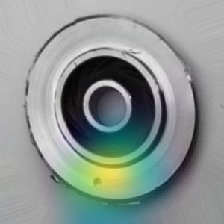

In [20]:
save_ok_image(ok_subset[0], "./ok_out/")
save_def_image(def_subset[0], "./def_out/")

In [11]:
!pwd

/home/ubuntu/src/msbuild-2022


In [9]:
!mkdir ok_out def_out

In [32]:
for i in def_subset:
    save_def_image(i, "./def_out/")

for i in ok_subset:
    save_ok_image(i, "./ok_out/")

In [22]:
import tensorflow as tf

In [23]:
!mkdir frozen_model

In [24]:
tf.saved_model.save(model, "./frozen_model/")